## <center><a>WhatsApp Data Analysis </a></center>

The project started off with basic data analyses, namely getting means and sums of different statistics such as average number of words per message per user and eventually evolved into analyzing topics that were frequently discussed in the chat.

## <a>Important Steps</a> 

1. set mobile time format to 24hrs
2. open watsapp select any contact
3. click on 3 dots then click on more
4. click on export chart -> without media 
5. copy .txt chat file and paste it in DATA folder

## <a>Functions</a> 


I imported all packages manually just to show you which are which and how they work. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(0,'..')  # Needed to import package in parent dir, remove this if you pip installed the package
from utils.whatsapp import helper      # Helper to prepare the data
from utils.whatsapp import general     # General statistics
from utils.whatsapp import tf_idf      # To calculate TF-IDF
from utils.whatsapp import emoji       # To analyze emoji use
from utils.whatsapp import topic       # Topic modelling and summarization
from utils.whatsapp import sentiment   # Sentiment Analysis
from utils.whatsapp import wordcloud   # Create Word Clouds\

from utils.colors   import colors      # Frequent Color Visualization

%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\way2v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\way2v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <a>General Statistics</a> 


Here you can find general data with regards to whatsapp conversations such as the number of messages and words. this is simply to get a general understanding of the conversations.

#### <a>Prepare Data</a> 


The data is preprocessed by loading in the raw txt file which is sent through whatsapp to your mail. The following columns are created:
* Message_Raw
    * The raw message for each user (including date and name of user)
* User
    * The user who has sent the message, if no users have sent that message
    then it is simply removed from the dataframe
* Message_Clean
    * Only containing the message, but with all possible symbols in there
    Thus, no date and no name of the user
* Message_Only_Text
    * Only text, lowercase
* Date
    * Date in the format y/m/d

In [3]:
df = helper.import_data(r'C:\Users\way2v\Whatsapp chat\data\WhatsApp Chat with Akshitha Shirin Hydrebad.txt')

In [4]:
df.shape # total number of messeges is 1156

(5938, 3)

In [5]:
df.head(10)

,index,Message_Raw,User
0,0,"14/02/2023, 22:14 - Vivek K: 😂😂😂\n",Vivek K
1,1,"14/02/2023, 22:42 - Vivek K: Chup baitho\n",Vivek K
2,2,"14/02/2023, 22:42 - Vivek K: Shant raho\n",Vivek K
3,3,"14/02/2023, 22:43 - Vivek K: Phone pe kaise duu\n",Vivek K
4,4,"14/02/2023, 22:43 - Vivek K: 😂😂😂😂\n",Vivek K
5,5,"14/02/2023, 22:43 - Vivek K: 🤭🤭🤭\n",Vivek K
6,6,"14/02/2023, 22:43 - Vivek K: Shant baitho abhi\n",Vivek K
7,7,"14/02/2023, 22:43 - Vivek K: Khaana khaoo\n",Vivek K
8,8,"14/02/2023, 22:44 - Vivek K: Nooooo\n",Vivek K
9,9,"14/02/2023, 22:45 - Vivek K: Nooo\n",Vivek K


In [6]:
df.columns

Index(['index', 'Message_Raw', 'User'], dtype='object')

In [7]:
df = helper.preprocess_data(df)

In [8]:
df.head(10)

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week
0,0,"14/02/2023, 22:14 - Vivek K: 😂😂😂\n",Vivek K,😂😂😂,,2023-02-14 22:14:00,22,1
3474,0,"14/02/2023, 22:16 - Akshitha Shirin Hydrebad: ...",Akshitha Shirin Hydrebad,😂😂😂,,2023-02-14 22:16:00,22,1
3477,3,"14/02/2023, 22:22 - Akshitha Shirin Hydrebad: ...",Akshitha Shirin Hydrebad,I want another quarter bottle,i want another quarter bottle,2023-02-14 22:22:00,22,1
3476,2,"14/02/2023, 22:22 - Akshitha Shirin Hydrebad: ...",Akshitha Shirin Hydrebad,😒😒😒,,2023-02-14 22:22:00,22,1
3475,1,"14/02/2023, 22:22 - Akshitha Shirin Hydrebad: ...",Akshitha Shirin Hydrebad,😒😒😒,,2023-02-14 22:22:00,22,1
3478,4,"14/02/2023, 22:31 - Akshitha Shirin Hydrebad: ...",Akshitha Shirin Hydrebad,😒😒😒,,2023-02-14 22:31:00,22,1
3479,5,"14/02/2023, 22:35 - Akshitha Shirin Hydrebad: ...",Akshitha Shirin Hydrebad,😒😒,,2023-02-14 22:35:00,22,1
3480,6,"14/02/2023, 22:35 - Akshitha Shirin Hydrebad: ...",Akshitha Shirin Hydrebad,😒😒,,2023-02-14 22:35:00,22,1
1,1,"14/02/2023, 22:42 - Vivek K: Chup baitho\n",Vivek K,Chup baitho,chup baitho,2023-02-14 22:42:00,22,1
2,2,"14/02/2023, 22:42 - Vivek K: Shant raho\n",Vivek K,Shant raho,shant raho,2023-02-14 22:42:00,22,1


In [9]:
df.columns

Index(['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text',
       'Date', 'Hour', 'Day_of_Week'],
      dtype='object')

In [10]:
df["Message_Raw"][:30]

0                      14/02/2023, 22:14 - Vivek K: 😂😂😂\n
3474    14/02/2023, 22:16 - Akshitha Shirin Hydrebad: ...
3477    14/02/2023, 22:22 - Akshitha Shirin Hydrebad: ...
3476    14/02/2023, 22:22 - Akshitha Shirin Hydrebad: ...
3475    14/02/2023, 22:22 - Akshitha Shirin Hydrebad: ...
3478    14/02/2023, 22:31 - Akshitha Shirin Hydrebad: ...
3479    14/02/2023, 22:35 - Akshitha Shirin Hydrebad: ...
3480    14/02/2023, 22:35 - Akshitha Shirin Hydrebad: ...
1              14/02/2023, 22:42 - Vivek K: Chup baitho\n
2               14/02/2023, 22:42 - Vivek K: Shant raho\n
5                      14/02/2023, 22:43 - Vivek K: 🤭🤭🤭\n
6        14/02/2023, 22:43 - Vivek K: Shant baitho abhi\n
7             14/02/2023, 22:43 - Vivek K: Khaana khaoo\n
3       14/02/2023, 22:43 - Vivek K: Phone pe kaise duu\n
3481    14/02/2023, 22:43 - Akshitha Shirin Hydrebad: ...
3482    14/02/2023, 22:43 - Akshitha Shirin Hydrebad: ...
3483    14/02/2023, 22:43 - Akshitha Shirin Hydrebad: ...
3484    14/02/

In [11]:
df['Message_Clean'][:]

0                                 😂😂😂
3474                              😂😂😂
3477    I want another quarter bottle
3476                              😒😒😒
3475                              😒😒😒
                    ...              
5934                             😒😒😒😒
5936                                😒
3472                       Good night
5937                     Good morning
3473                     Good morning
Name: Message_Clean, Length: 5915, dtype: object

In [12]:
# Change labels for anonymization - Leave this at False
if True:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Vivek', 'Akshitha'])}
    df.User = df.User.map(user_labels)

#### <a> Users in the group</a> 


In [13]:
general.print_users(df)

#############
##  Users  ##
#############

Akshitha
Vivek


#### <a> Users in the group</a> 


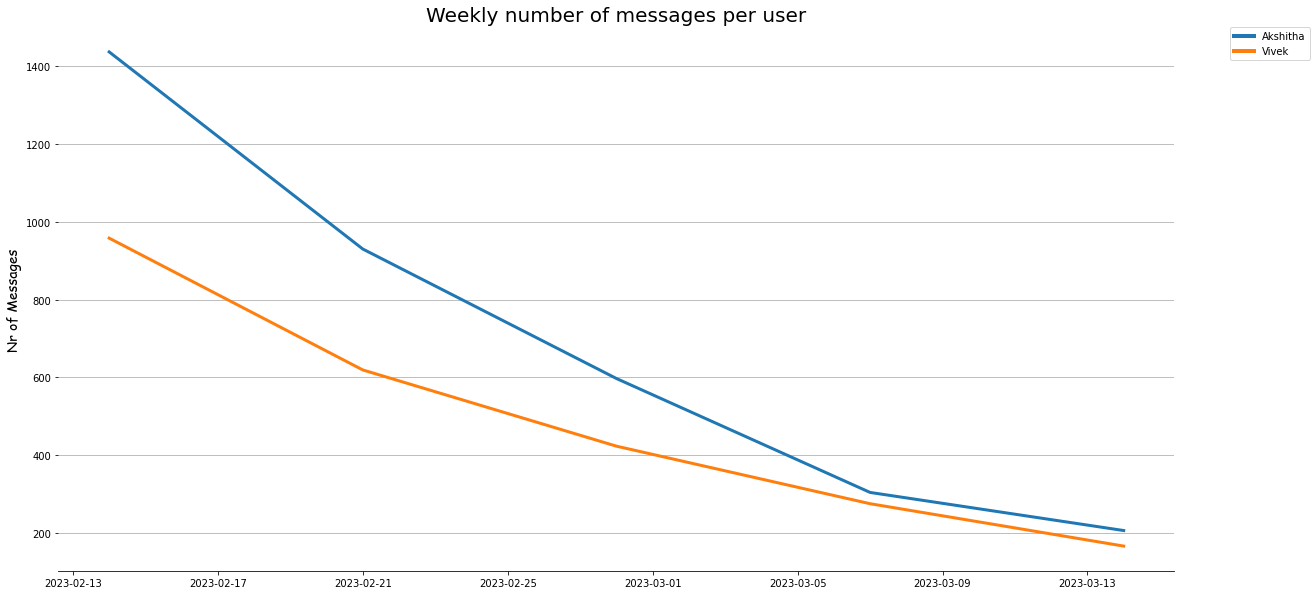

In [14]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#### <a>Active Moments</a> 


**Daily Activity**  
This shows the daily activity per person in a spider plot and in total in a histogram. 
NOTE: This is unstandardized data, which means that it also shows the amount of messages. 

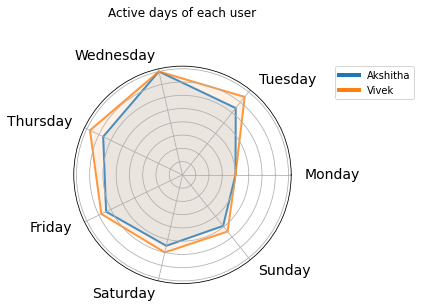

In [15]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

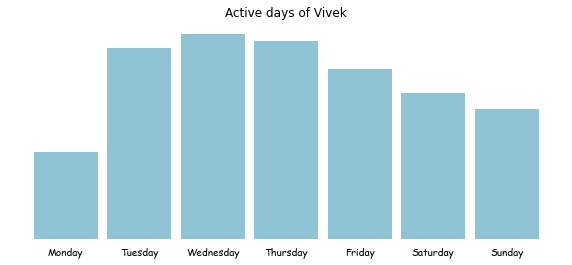

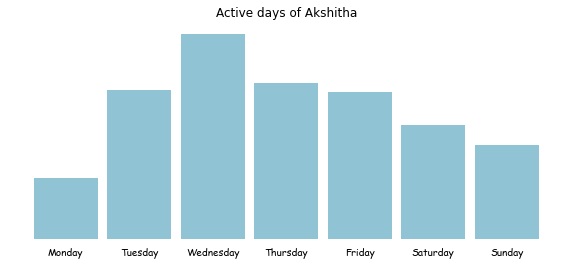

In [16]:
general.plot_active_days(df, savefig=False, dpi=100, user='Vivek')
general.plot_active_days(df, savefig=False, dpi=100, user='Akshitha')

**Hourly Activity**  
It shows which days are most active based on the period in which most messages are send. 

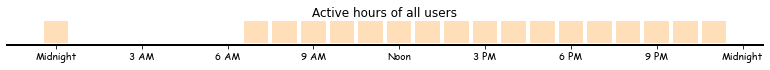

In [17]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

**Calendar Map**  
Here you can choose for which year you want to see the activity

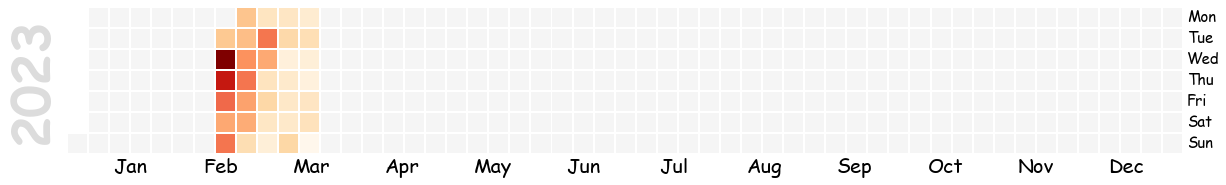

In [18]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

#### <a>Averages / Summaries</a> 


Here you can find general averages and summaries. For those that are interested how often a person said "I love you", you can also find that. 

In [19]:
general.print_stats(df, love=False)

##########################
##  Number of Messages  ##
##########################

3474	Akshitha
2441	Vivek

#######################
##  Number of Words  ##
#######################

11220	Akshitha
6793	Vivek

#########################
##  Messages per hour  ##
#########################

Akshitha:	4.4652956298200515
Vivek:	3.1415701415701416

################################
##  Avg nr Words per Message  ##
################################

Akshitha: 3.23
Vivek: 2.78

#############################
##  Avg length of Message  ##
#############################

Akshitha: 14.1
Vivek: 11.73

##############################
##  Highscore Day per User  ##
##############################

Akshitha
Messages: 	426
Day: 		2023-02-15

Vivek
Messages: 	198
Day: 		2023-02-16



#### <a>Response Time</a> 


In [20]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Vivek:                        10.31
Akshitha:                     13.93

##############################
##  Nr. Initiated Messages  ##
##############################



## <a >TF-IDF</a> 


#### <a>Create Count Vector</a> 


It creates the dataframe "counts" which is a dataframe that contains each word that is said in all conversations and counts how often each user has said that word. 

In [21]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language="english", column="Word")

In [22]:
counts[:30]

,Word,Akshitha,Vivek
2,want,42,23
3,another,0,6
4,quarter,0,3
5,bottle,0,3
6,chup,12,4
7,baitho,4,0
8,shant,5,0
9,raho,2,0
10,abhi,42,2
11,khaana,13,1


In [23]:
counts.loc[counts['Word']=="help"]

,Word,Akshitha,Vivek
985,help,2,2


In [24]:
counts.loc[counts['Word']=="idar"]

,Word,Akshitha,Vivek
101,idar,6,0


In [25]:
counts.loc[counts['Word']=="study"]

,Word,Akshitha,Vivek
758,study,19,6


In [26]:
counts.loc[counts['Word']=="care"]

,Word,Akshitha,Vivek
1261,care,4,5


In [27]:
counts.loc[counts['Word']=="job"]

,Word,Akshitha,Vivek
997,job,7,8


In [28]:
counts.loc[counts['Word']=="love"]

,Word,Akshitha,Vivek
1855,love,5,5


#### <a>Unique Words</a> 


In [29]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

In [30]:
unique_words

,Word,Akshitha,Vivek,Akshitha_TF_IDF,Vivek_TF_IDF,Akshitha_Unique,Vivek_Unique
2,want,42,23,193.967564,108.261782,1.791653,0.558144
3,another,0,6,6.894412,48.256174,0.142871,6.999317
4,quarter,0,3,7.587652,30.348478,0.250018,3.999719
5,bottle,0,3,7.587652,30.348478,0.250018,3.999719
6,chup,12,4,76.865348,29.564802,2.599894,0.384631
...,...,...,...,...,...,...,...
2274,hero,2,0,23.977371,7.994143,2.999367,0.333404
2275,uski,1,0,17.371659,8.687467,1.999623,0.500094
2276,heroine,1,0,17.371659,8.687467,1.999623,0.500094
2277,stupid,0,1,8.686412,17.372714,0.500003,1.999987


#### <a>Plot Image</a> 


In [31]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Akshitha
Vivek


**Instructions**  
Make sure to change "user" in the function below to one of the users as seen above. It needs to be the exact same naming otherwise it will not work. Furthermore, a valid picture needs to be selected. You can choose the sizing yourself which might need some experimenting with before finding the right size. It also works with a link to the image online. 

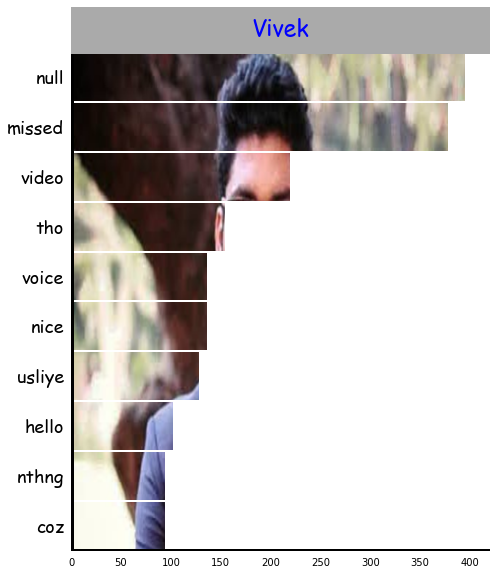

In [32]:
tf_idf.plot_unique_words(unique_words, 
                         user='Vivek', 
                         image_path=r"C:\Users\way2v\Downloads\Vivek_img.jpeg", # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Vivek", 
                         title_color="Blue", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

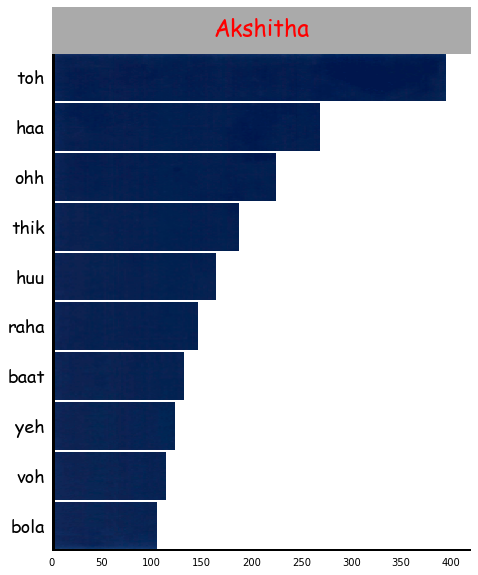

In [33]:
tf_idf.plot_unique_words(unique_words, 
                         user="Akshitha", 
                         image_path='../images/mask.png', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Akshitha", 
                         title_color="Red", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

# <a>Emoji Analysis</a> 

These analysis are based on the Emojis used in each message. Below you can find the following:
* Unique Emoji per user
* Commonly used Emoji per user
* Highly correlated Emoji per user

In [34]:

temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

#### <a>Unique and Common Emoji</a> 





In [35]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Akshitha
:/ 0.3513669064748201
8p 0.3513669064748201

Vivek
:/ 2.846027846027847
8p 2.8460278460278468

#########################
### Most Common Emoji ###
#########################

Akshitha
:/ 1

Vivek
:/ 3
8p 1



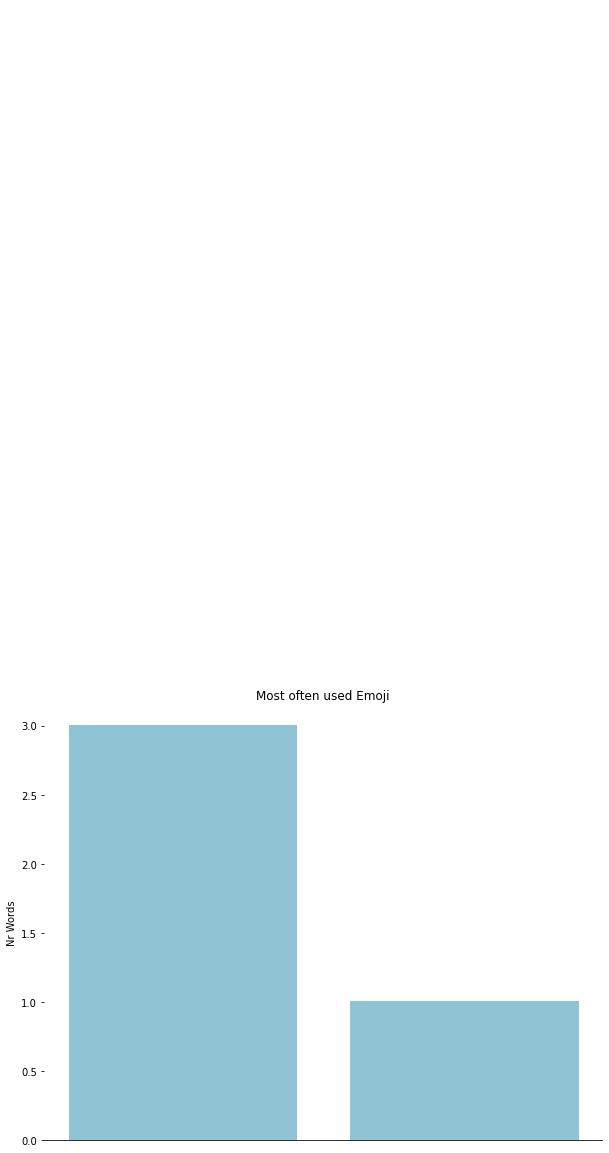

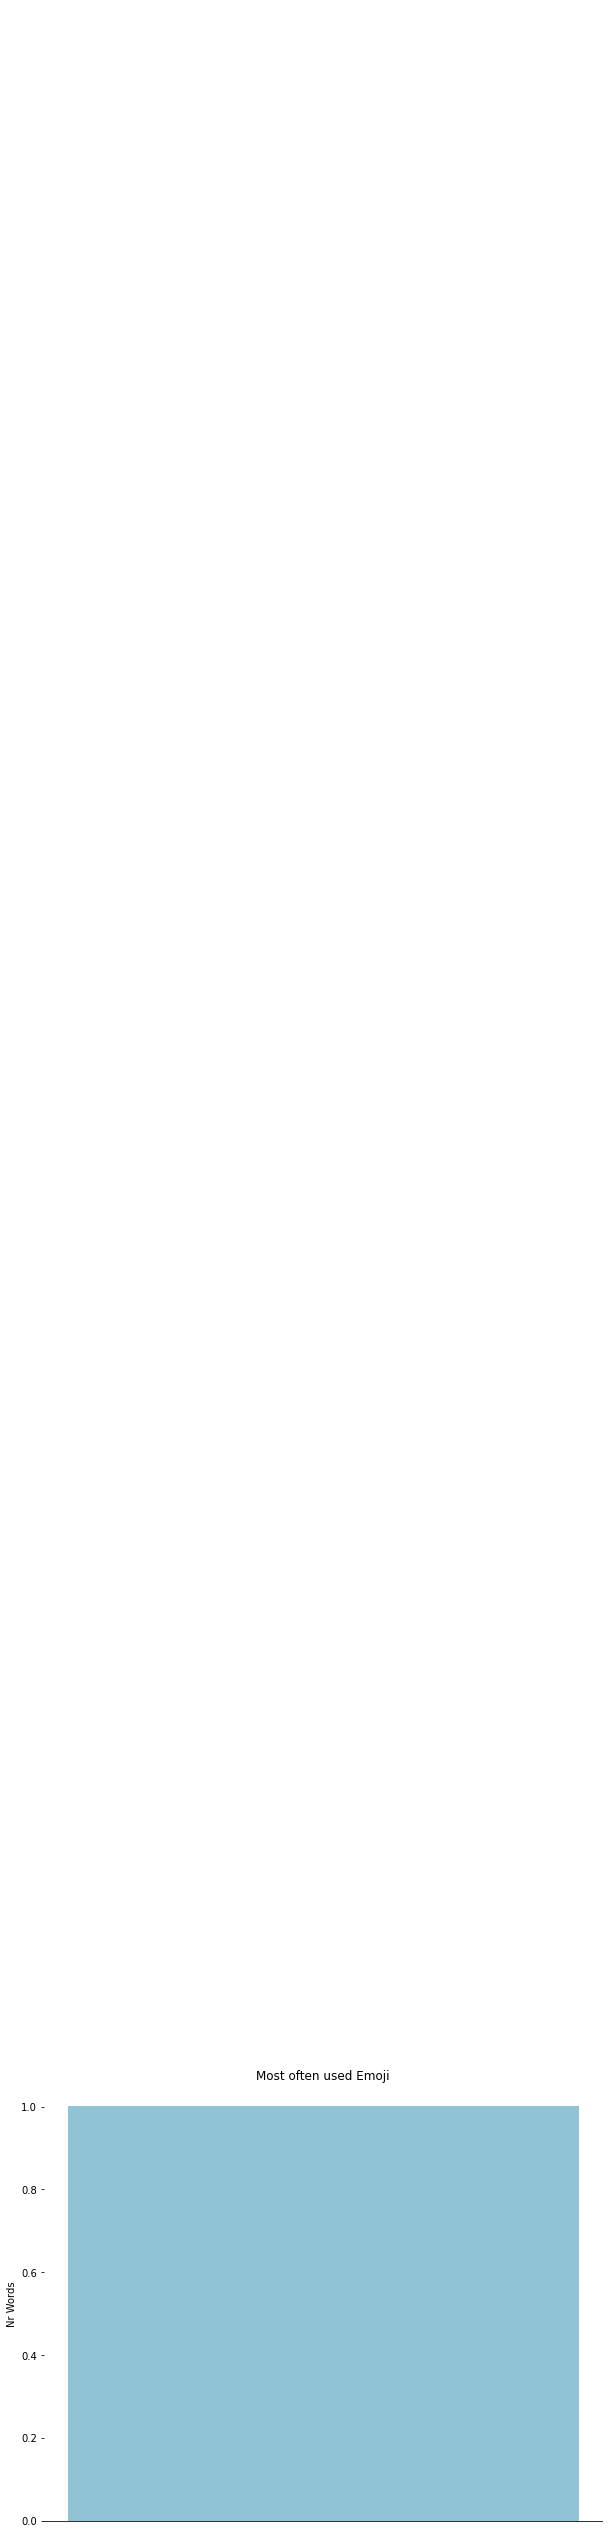

In [36]:
emoji.plot_counts(counts, user = "Vivek")
emoji.plot_counts(counts, user = "Akshitha")

#### <a>Correlation Matrix</a> 


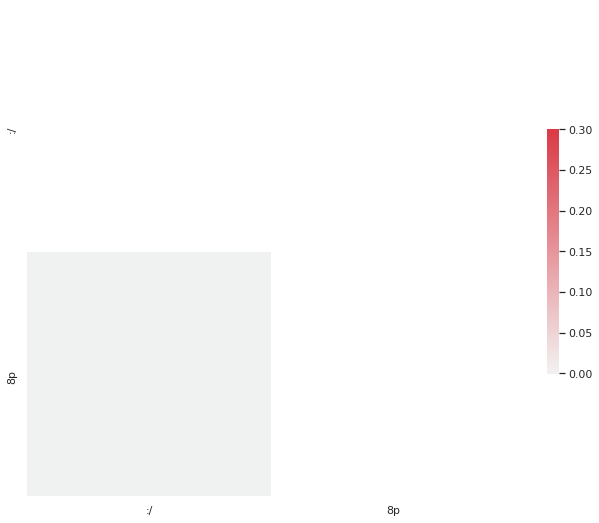

In [37]:
emoji.plot_corr_matrix(df, "Vivek", list_of_words, counts)

# <a>Topic Modelling</a> 


In [38]:
df['Message_Only_Text'] # Use This column

0                                    
3474                                 
3477    i want another quarter bottle
3476                                 
3475                                 
                    ...              
5934                                 
5936                                 
3472                       good night
5937                     good morning
3473                     good morning
Name: Message_Only_Text, Length: 5915, dtype: object

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df['Message_Only_Text']) 

In [40]:
dtm   # so we have 1102 documents and 398 features

<5915x947 sparse matrix of type '<class 'numpy.float64'>'
	with 9099 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=7, random_state=42) # nmf is faster than lda 
nmf_model.fit(dtm) 

NMF(n_components=7, random_state=42)

In [42]:
nmf_model.components_

array([[1.23835050e-04, 0.00000000e+00, 0.00000000e+00, ...,
        7.81679131e-03, 3.08969244e-05, 0.00000000e+00],
       [2.96313912e-05, 1.98220770e-05, 0.00000000e+00, ...,
        5.36249053e-03, 9.96511076e-05, 0.00000000e+00],
       [2.68794732e-03, 3.63897799e-04, 5.46154875e-04, ...,
        2.60156739e-03, 4.18130262e-03, 0.00000000e+00],
       ...,
       [3.93435032e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.64579004e-03, 1.67211523e-04, 6.59289119e-03, ...,
        4.26587521e-03, 9.50702777e-04, 0.00000000e+00],
       [2.86080088e-04, 0.00000000e+00, 1.82715518e-04, ...,
        4.97641848e-02, 8.76573863e-04, 0.00000000e+00]])

In [43]:
for i, topic in enumerate(nmf_model.components_):
    print("THE TOP 15 WORDS FOR TOPIC # {}".format(i))
    print([tfidf.get_feature_names()[index]  for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

THE TOP 15 WORDS FOR TOPIC # 0
['time', 'na', 'ha', 'fine', 'cool', 'wake', 'talk', 'sir', 'noo', 'sleep', 'ji', 'bye', 'hai', 'thik', 'okay']




THE TOP 15 WORDS FOR TOPIC # 1
['career', 'talk', 'pay', 'acha', 'eyes', 'youll', 'beautiful', 'feel', 'sleep', 'ohh', 'ji', 'haa', 'night', 'morning', 'good']




THE TOP 15 WORDS FOR TOPIC # 2
['class', 'abhi', 'toh', 'bolu', 'fir', 'dinner', 'bolo', 'thik', 'ha', 'mai', 'ji', 'haa', 'hai', 'hua', 'kya']




THE TOP 15 WORDS FOR TOPIC # 3
['haa', 'leave', 'dont', 'want', 'walk', 'home', 'study', 'tomorrow', 'eat', 'talk', 'mins', 'later', 'sleep', 'wait', 'ill']




THE TOP 15 WORDS FOR TOPIC # 4
['day', 'mujhe', 'rahe', 'pe', 'aa', 'sounds', 'phone', 'night', 'daily', 'ooo', 'calls', 'seeing', 'voice', 'video', 'missed']




THE TOP 15 WORDS FOR TOPIC # 5
['maine', 'acha', 'aisa', 'baat', 'pata', 'abhi', 'thik', 'mujhe', 'na', 'mai', 'toh', 'bhi', 'hai', 'kuch', 'nahi']




THE TOP 15 WORDS FOR TOPIC # 6
['high', 'dont', 'just', 'know', '

In [44]:
from utils.whatsapp import topic
df['Message_Prepared'] = df['Message_Only_Text']

#### <a>LDA</a> 
There is an abundance of methods with regards to topic modelling. Two, however, seem to be the most used: LDA and NMF. Sklearn has an implementation of both LDA and NMF.

In [45]:
topic.topics(df, model='lda', language="english")

################
### Akshitha ###
################


Topics in lda model:
Topic #0: okay hai mai nahi acha kuch ohh
Topic #1: im hey bolo ko going ohhh hero
Topic #2: kya say file attached fir imgwajpg didnt
Topic #3: call ill haa good youre go ji
Topic #4: toh hai hua mujhe wait want abhi

#############
### Vivek ###
#############


Topics in lda model:
Topic #0: call missed video say said cut talk
Topic #1: okay good morning bolo hai see attached
Topic #2: nahi dont kuch chup know time even
Topic #3: null go ill bye coz want didnt
Topic #4: im ha kya yeah cant night ji



#### <a name="topic-nmf">5.3 NMF </a> 
[Back to Table of Contents](#table)

An application of the NMF model used for topic modelling. 

In [46]:
topic.topics(df, model='nmf', language="english")

################
### Akshitha ###
################


Topics in nmf model:
Topic #0: okay thik hai im noo youre bas
Topic #1: kya hua hai mai nahi thik dinner
Topic #2: haa ji toh hai bolo boliye jii
Topic #3: ill call go wait later afterwards sometime
Topic #4: ohh acha hai thik ji good ohhh

#############
### Vivek ###
#############


Topics in nmf model:
Topic #0: okay bye ji sleep sir im wake
Topic #1: call missed video voice cut free ill
Topic #2: null youre guy gfs ghar girl give
Topic #3: good morning night im also ji food
Topic #4: nahi kuch hai kya hua hoga bolungi



## <a>Sentiment</a> 


#### <a>Prepare Data</a> 

In [47]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# analyser = SentimentIntensityAnalyzer()
# df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

#### <a>Average Sentiment Per User</a> 


Prints the average sentiment per user to get an indication of positivity of that user. 


In [48]:
#pip install pattern

In [49]:
from pattern.nl import sentiment as sentiment_nl
df['Sentiment'] = df.apply(lambda row: sentiment_nl(row.Message_Clean)[0], 1)

In [50]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Akshitha:                     		0.064
Vivek:                        		-0.035





#### <a>Plot Sentiment</a> 


The y-axis works as follows, a happy smiley indicates a score of 1 (max value) meaning a positive message and a sad smiley indicates a score of -1 (min value) meaning a negative message. 

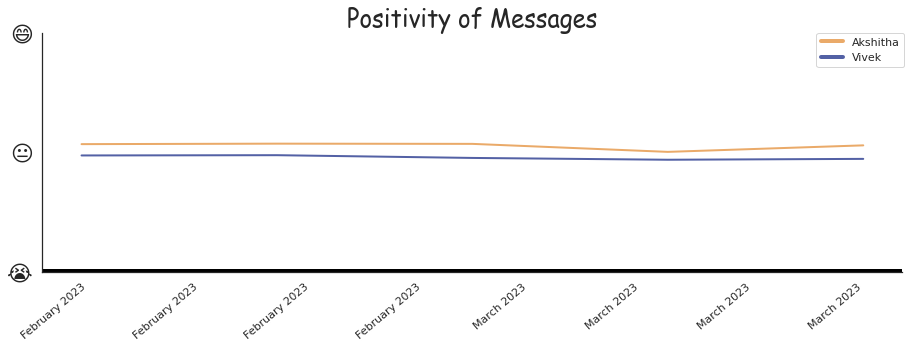

In [51]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

# <a>Word Clouds</a> 


#### <a>Prepare Data</a> 


In [52]:
user = "Vivek"
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="dutch", column="Word")
words = counts[["Word", user]].set_index('Word').to_dict()[user]

#### <a> Masked Word Cloud</a> 


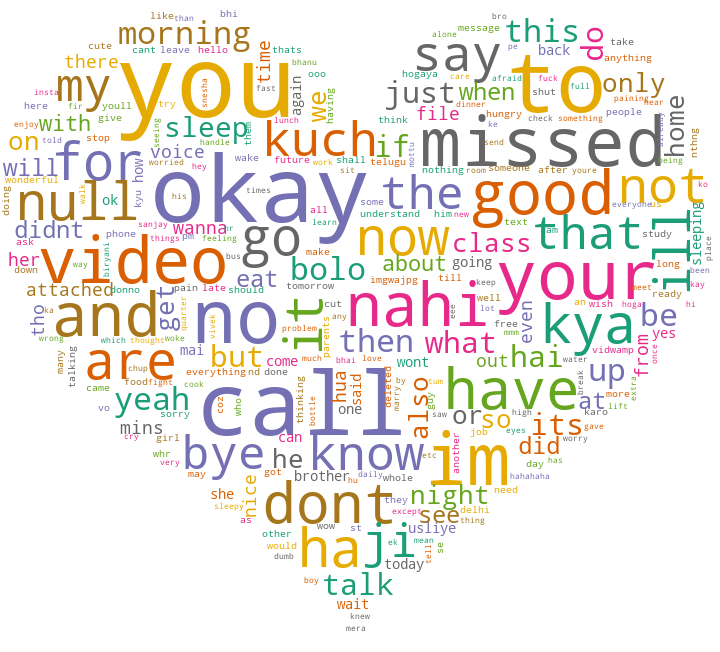

In [53]:
wordcloud.create_wordcloud(words,random_state=42, mask="../images/heart.jpg",
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)

## <a>Sentiment-based Word Cloud</a> 



In [54]:
# Choose which user you want to see the word cloud for
positive, negative = wordcloud.extract_sentiment_count(counts, user = "Vivek")

##### <a> Positive Words </a>

In [55]:
wordcloud.create_wordcloud(data=positive, cmap='Greens', mask='mask.png', 
                    stopwords='stopwords.txt', random_state=42, max_words=1000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.3)

ValueError: We need at least 1 word to plot a word cloud, got 0.

##### <a>Negative Words</a>

In [56]:
wordcloud.create_wordcloud(data=negative, cmap='Reds', mask='mask.png', 
                    stopwords='stopwords.txt', random_state=42, max_words=10000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.3)

ValueError: We need at least 1 word to plot a word cloud, got 0.

# <a>Picture Analysis</a> 

#### <a>Extract Frequent Colors (k-Means)</a> 


In [57]:
import os
import pickle

Below is the code to retrieve and dump the top 5 most frequent colors in an image using k-Means. 
It works as follows, each pixel in an image has its own color. That color of each pixel in an image is then extracted in an rgb format. This allows each pixel to have an x (r), y (g) and z (b) coordinate. After extracting all colors of each pixel, k-Means (with k=5) is then used to cluster the points into 5 colors. For each cluster the mediod is calculated and used as a representative of that cluster. Thus, you get top 5 colors for each image. 

In [58]:
extract_colors = False

if extract_colors:
    # Get Top 5 Frequent Colors
    path = 'Images/'
    all_colors = [colors.get_common_colors(path + i) for i in os.listdir(path)]

    # Save colors
    with open('colors.pkl', 'wb') as f:
        pickle.dump(all_colors, f)

#### <a>Plot Frequent Colors</a> 


After getting the top 5 colors for each picture, they are counted and then displayed below in a histogram. The histogram is in a circular shape where larger/bigger/higher bars indicate colors that are more frequent in the set of pictures. There is a version of the histogram that only shows bars and one that shows a smoothened histogram to be more visually pleasing. 

In [59]:
colors.plot_color('colors.pkl', smoothen=False, savefig=False)

FileNotFoundError: [Errno 2] No such file or directory: 'colors.pkl'

In [60]:
colors.plot_color('colors.pkl', smoothen=True, savefig=False)

FileNotFoundError: [Errno 2] No such file or directory: 'colors.pkl'